<a href="https://colab.research.google.com/github/drashtipatel19/ALY6110/blob/main/Drashti_M4_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
from google.colab import files
files.upload()

Saving cruise_ship_info.csv to cruise_ship_info.csv


{'cruise_ship_info.csv': b'Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew\nJourney,Azamara,6,30.276999999999997,6.94,5.94,3.55,42.64,3.55\nQuest,Azamara,6,30.276999999999997,6.94,5.94,3.55,42.64,3.55\nCelebration,Carnival,26,47.262,14.86,7.22,7.43,31.8,6.7\nConquest,Carnival,11,110.0,29.74,9.53,14.88,36.99,19.1\nDestiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.0\nEcstasy,Carnival,22,70.367,20.52,8.55,10.2,34.29,9.2\nElation,Carnival,15,70.367,20.52,8.55,10.2,34.29,9.2\nFantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.2\nFascination,Carnival,19,70.367,20.52,8.55,10.2,34.29,9.2\nFreedom,Carnival,6,110.23899999999999,37.0,9.51,14.87,29.79,11.5\nGlory,Carnival,10,110.0,29.74,9.51,14.87,36.99,11.6\nHoliday,Carnival,28,46.052,14.52,7.27,7.26,31.72,6.6\nImagination,Carnival,18,70.367,20.52,8.55,10.2,34.29,9.2\nInspiration,Carnival,17,70.367,20.52,8.55,10.2,34.29,9.2\nLegend,Carnival,11,86.0,21.24,9.63,10.62,40.49,9.3\nLiberty*,Carnival,8,110.0,29.74,

In [4]:
df = spark.read.csv("cruise_ship_info.csv", inferSchema=True, header = True)
df.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [37]:
df.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [7]:
df.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

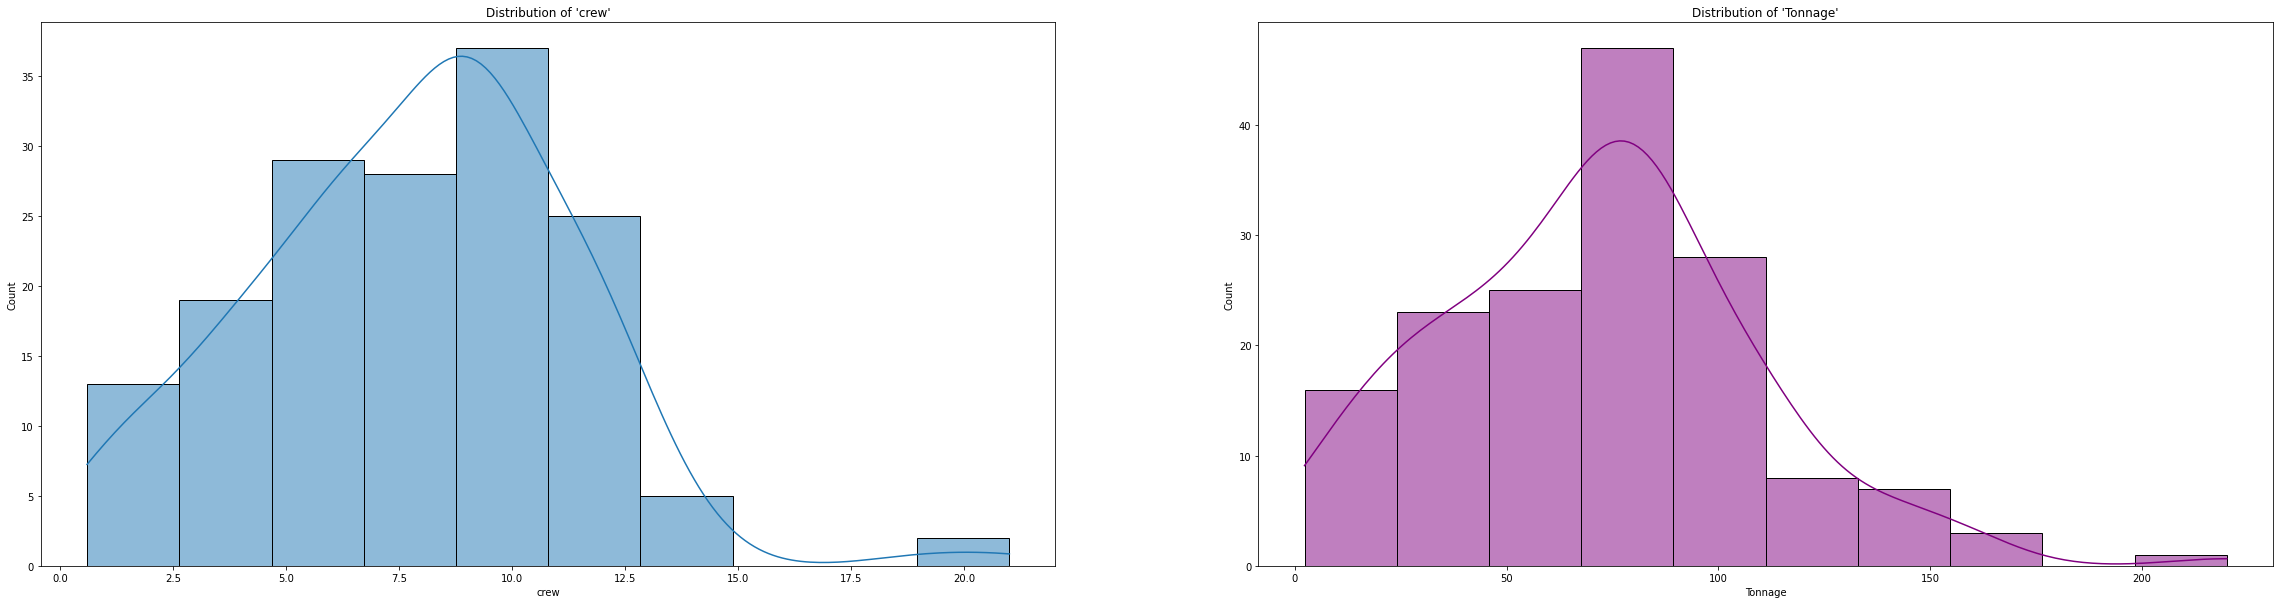

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(40, 10))
sns.histplot(ax = axes[0], x = pandasDF["crew"],
             bins = 10,
             kde = True).set(title = "Distribution of 'crew'");
sns.histplot(ax = axes[1], x = pandasDF["Tonnage"],
             bins = 10,
             kde = True,
             color = "purple").set(title = "Distribution of 'Tonnage'");

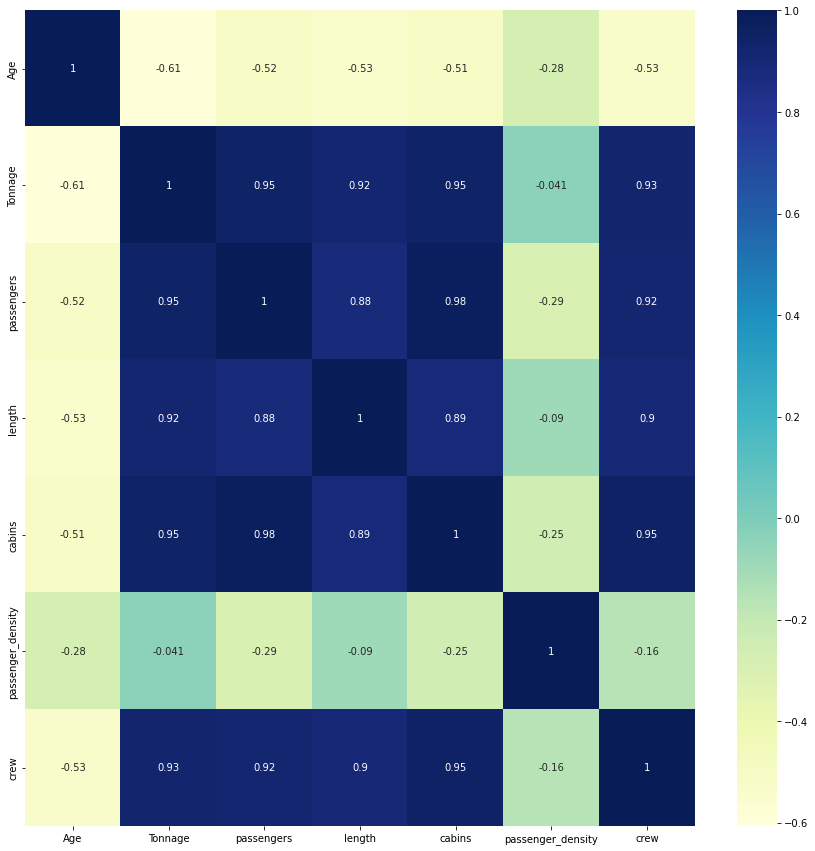

In [33]:
import seaborn as sns
pandasDF = df.toPandas()
from seaborn.widgets import color_palette
plt.figure(figsize = [15, 15], facecolor = 'white')
sns.heatmap(pandasDF.corr(), annot=True, cmap="YlGnBu");

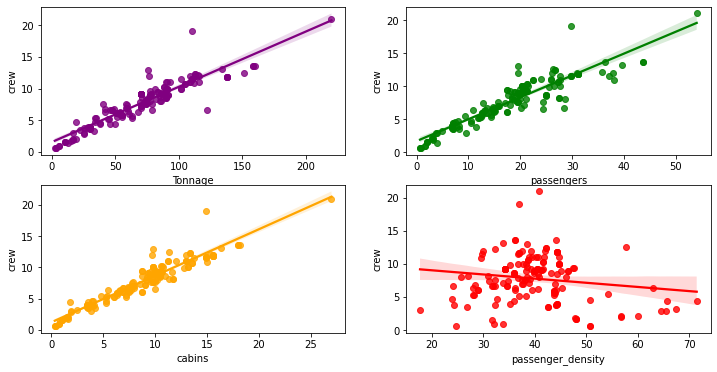

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "Tonnage", y = "crew", data = pandasDF,color='purple');
sns.regplot(ax = axes[1], x = "passengers", y = "crew", data = pandasDF,color='green');
sns.regplot(ax = axes[2], x = "cabins", y = "crew", data = pandasDF,color='orange');
sns.regplot(ax = axes[3], x = "passenger_density", y = "crew", data = pandasDF,color='red');

In [5]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
only_features = [
 
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [16]:
assembler = VectorAssembler(inputCols=only_features, outputCol= 'features')
feat_df = assembler.transform(df)
feat_df.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|            features|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|[6.0,30.276999999...|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|[6.0,30.276999999...|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|[26.0,47.262,14.8...|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|[11.0,110.0,29.74...|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|[17.0,101.353,26....|
+-----------+-----------+---+------------------+--------

In [17]:
final_data = feat_df.select('features','crew')

In [18]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [19]:
regressor = LinearRegression(labelCol='crew')

In [20]:
model = regressor.fit(train_data)

In [21]:
pred_data = model.evaluate(test_data)

In [22]:

pred_data.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|1.776356839400250...|
|1.421085471520200...|
|1.421085471520200...|
|-5.32907051820075...|
|1.598721155460225...|
|-1.77635683940025...|
|-3.55271367880050...|
|                 0.0|
|                 0.0|
|-1.24344978758017...|
|2.398081733190338...|
|-1.06581410364015...|
|5.329070518200751...|
|3.552713678800501...|
|7.105427357601002...|
|-1.06581410364015...|
|7.105427357601002...|
|3.552713678800501...|
|-7.10542735760100...|
|3.597122599785507...|
+--------------------+
only showing top 20 rows



In [25]:
pred_data.rootMeanSquaredError




1.603740819129473e-14

In [26]:
pred_data.meanAbsoluteError

1.1108286008204065e-14

In [27]:
pred_data.meanSquaredError

2.5719846149420735e-28

In [28]:
pred_data.r2

1.0

In [30]:
unlabeled_data = test_data.select('features')
test_predictions = model.transform(unlabeled_data)

In [31]:
test_predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[5.0,133.5,39.59,...|13.129999999999983|
|[6.0,110.23899999...|11.499999999999986|
|[6.0,113.0,37.82,...|11.999999999999986|
|[7.0,116.0,31.0,9...|12.000000000000005|
|[7.0,158.0,43.7,1...|13.599999999999984|
|[8.0,110.0,29.74,...|11.600000000000001|
|[9.0,81.0,21.44,9...|10.000000000000004|
|[9.0,85.0,19.68,9...|              8.69|
|[9.0,88.5,21.24,9...|              10.3|
|[9.0,113.0,26.74,...|12.380000000000013|
|[10.0,46.0,7.0,6....| 4.469999999999976|
|[10.0,58.825,15.6...| 7.000000000000011|
|[10.0,81.76899999...| 8.419999999999995|
|[10.0,86.0,21.14,...| 9.199999999999996|
|[10.0,90.09,25.01...| 8.579999999999993|
|[10.0,151.4,26.2,...| 12.53000000000001|
|[11.0,85.0,18.48,...| 7.999999999999993|
|[11.0,91.62700000...| 8.999999999999996|
|[11.0,108.977,26....|12.000000000000007|
|[12.0,25.0,3.88,5...| 2.869999999999964|
+--------------------+------------